In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from collections import Counter
from scipy.spatial import distance

In [2]:
file_path = "C:/Users/saket/Desktop/prog2dataset/diabetes.csv"
data = pd.read_csv(file_path)

In [3]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
 euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn(X_train, y_train, x, k=5, weights=None, metric='euclidean'):
    if weights is None:
        weights = [1.0]
    if metric == 'euclidean':
        dist_func = distance.euclidean
    elif metric == 'manhattan':
        dist_func = distance.cityblock
    
    distances = [dist_func(X_train[i] * weights, x * weights) for i in range(len(X_train))]
    k_indices = np.argsort(distances)[:k]def
    return Counter(y_train.iloc[k_indices]).most_common(1)[0][0]

def predict(X_train, y_train, X_test, k=5, weights=None, metric='euclidean'):
    return [knn(X_train, y_train, x, k, weights, metric) for x in X_test]

In [14]:
k = 5
weights = ([2.0, 20.0, 2.5, 0.5, 2.5, 1.0, 0.5, 1.0])  # Define custom weights for each feature
y_pred_weighted = predict(X_train, y_train, X_test, k, weights)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy with k={k} and weighted features: {accuracy_weighted:.2f}")

y_pred_euclidean = predict(X_train, y_train, X_test, k=5, weights=None, metric='euclidean')
y_pred_manhattan = predict(X_train, y_train, X_test, k=5, weights=None, metric='manhattan')

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy (Euclidean): {accuracy_euclidean:.2f}")
print(f"Accuracy (Manhattan): {accuracy_manhattan:.2f}")

Accuracy with k=5 and weighted features: 0.70
Accuracy (Euclidean): 0.69
Accuracy (Manhattan): 0.66


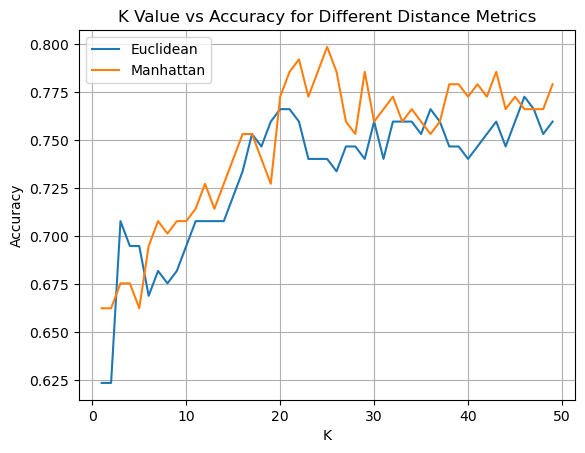

In [12]:
k_values = list(range(1, 50))

# Calculate accuracies for different distance metrics
accuracies_euclidean = [accuracy_score(y_test, predict(X_train, y_train, X_test, k, metric='euclidean')) for k in k_values]
accuracies_manhattan = [accuracy_score(y_test, predict(X_train, y_train, X_test, k, metric='manhattan')) for k in k_values]

# Plot the graphs
plt.plot(k_values, accuracies_euclidean, label='Euclidean')
plt.plot(k_values, accuracies_manhattan, label='Manhattan')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy for Different Distance Metrics")
plt.grid()
plt.legend()
plt.show()